# EDA

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os 

In [9]:
os.getcwd()

'/Users/Dali/Documents/DSI-7/Capstone/Code/2_Explore_Analyze'

In [10]:
aapl=pd.read_csv('../csv/aapl_8.csv', index_col=0)
goog=pd.read_csv('../csv/goog_8.csv', index_col=0)
msft=pd.read_csv('../csv/msft_8.csv', index_col=0)
adbe=pd.read_csv('../csv/adbe_8.csv', index_col=0)
akam=pd.read_csv('../csv/akam_8.csv', index_col=0)
fcbk=pd.read_csv('../csv/fcbk_8.csv', index_col=0)
amzn=pd.read_csv('../csv/amzn_8.csv', index_col=0)
ibm=pd.read_csv('../csv/ibm_8.csv', index_col=0)
intc=pd.read_csv('../csv/intc_8.csv', index_col=0)
csco=pd.read_csv('../csv/csco_8.csv', index_col=0)
ea=pd.read_csv('../csv/ea_8.csv', index_col=0)
ebay=pd.read_csv('../csv/ebay_8.csv', index_col=0)

In [11]:
comps = aapl
comps = aapl.append(goog, ignore_index=True, sort=None)
comps = comps.append(msft, ignore_index=True, sort=None)
comps = comps.append(adbe, ignore_index=True, sort=None)
comps = comps.append(akam, ignore_index=True, sort=None)
comps = comps.append(fcbk, ignore_index=True, sort=None)
comps = comps.append(amzn, ignore_index=True, sort=None)
comps = comps.append(ibm, ignore_index=True, sort=None)
comps = comps.append(intc, ignore_index=True, sort=None)
comps = comps.append(csco, ignore_index=True, sort=None)
comps = comps.append(ea, ignore_index=True, sort=None)
comps = comps.append(ebay, ignore_index=True, sort=None)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
tickers = comps.ticker
ticker_encoder = LabelEncoder()
ticker_encoded = ticker_encoder.fit_transform(tickers)
comps['ticker'] = ticker_encoded

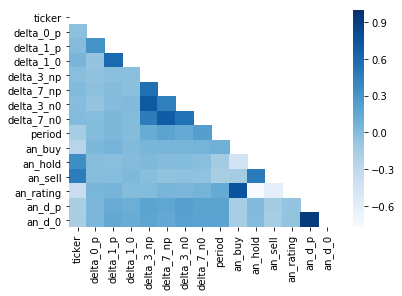

In [13]:
corr = comps.corr()
mask = np.zeros_like(corr) # not to repeat the symmetrical side of the heatmaap
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='Blues')

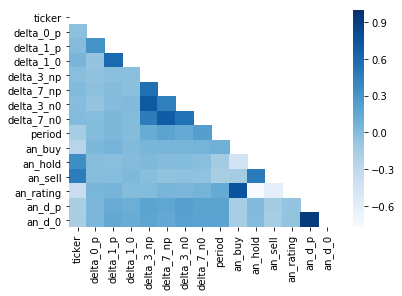

In [14]:
corr = comps.corr()
mask = np.zeros_like(corr) # not to repeat the symmetrical side of the heatmaap
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='Blues')

In [15]:
#comps.columns

In [16]:
# #it's a classification problem!
# sns.pairplot(aapl, vars=['delta_0_p',
#        'delta_1_p', 'delta_1_0', 'delta_3_np', 'delta_7_np', 'delta_3_n0',
#        'delta_7_n0', 'an_buy', 'an_rating',
#        'an_d_p', 'an_d_0'])

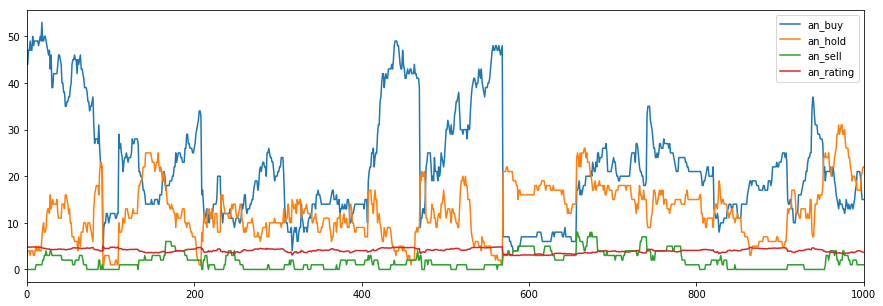

In [9]:
comps[['an_buy', 'an_hold', 'an_sell', 'an_rating']].plot(figsize=(15,5))

<BarContainer object of 2 artists>

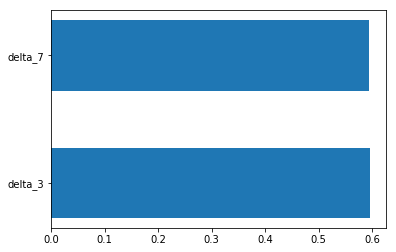

In [10]:
plt.barh(['delta_3', 'delta_7'],comps[['delta_3_np', 'delta_3_n0']].mean(),comps[['delta_7_n0']].mean())

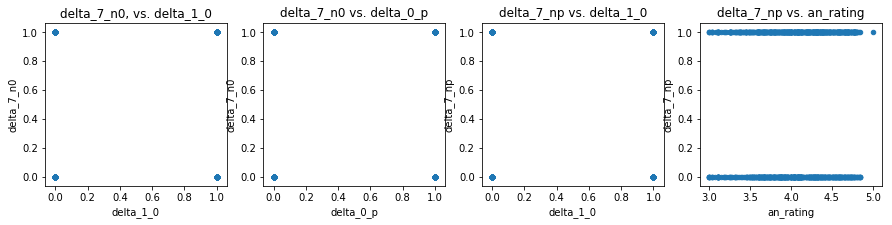

In [11]:
fig,ax = plt.subplots(
        nrows = 1,
        ncols = 4,
        figsize = (15,3)
        )

comps.plot(kind = 'scatter', title ="delta_7_n0, vs. delta_1_0", x='delta_1_0', y = 'delta_7_n0', ax = ax[0])
comps.plot(kind = 'scatter', title ="delta_7_n0 vs. delta_0_p", x='delta_0_p', y = 'delta_7_n0', ax = ax[1])
comps.plot(kind = 'scatter', title ="delta_7_np vs. delta_1_0", x='delta_1_0', y = 'delta_7_np', ax = ax[2])
comps.plot(kind = 'scatter', title ="delta_7_np vs. an_rating", x='an_rating', y = 'delta_7_np', ax = ax[3])



In [12]:
comps_variables = comps[['ticker', 'date', 'delta_0_p',
       'delta_1_p', 'delta_1_0','an_buy', 'period','delta_3_np', 'delta_7_np', 'delta_3_n0',
       'delta_7_n0']]

In [13]:
correlation = comps_variables.corr()[['delta_3_np']]
correlation['delta_3_n0'] = comps.corr()[['delta_3_n0']]
correlation['delta_7_np'] = comps.corr()[['delta_7_np']]
correlation['delta_7_n0'] = comps.corr()[['delta_7_n0']]


correlation

,delta_3_np,delta_3_n0,delta_7_np,delta_7_n0
ticker,-0.016535,-0.008430,0.021354,0.014308
delta_0_p,-0.053957,-0.064068,-0.031897,-0.007193
delta_1_p,-0.023968,-0.005323,-0.004635,0.030293
delta_1_0,-0.021908,0.016928,-0.022168,0.007384
an_buy,0.045714,0.053102,0.053556,0.066732
period,0.123146,0.140883,0.194558,0.231882
delta_3_np,1.000000,0.720191,0.558926,0.476110
delta_7_np,0.558926,0.458459,1.000000,0.700591
delta_3_n0,0.720191,1.000000,0.458459,0.547724
delta_7_n0,0.476110,0.547724,0.700591,1.000000


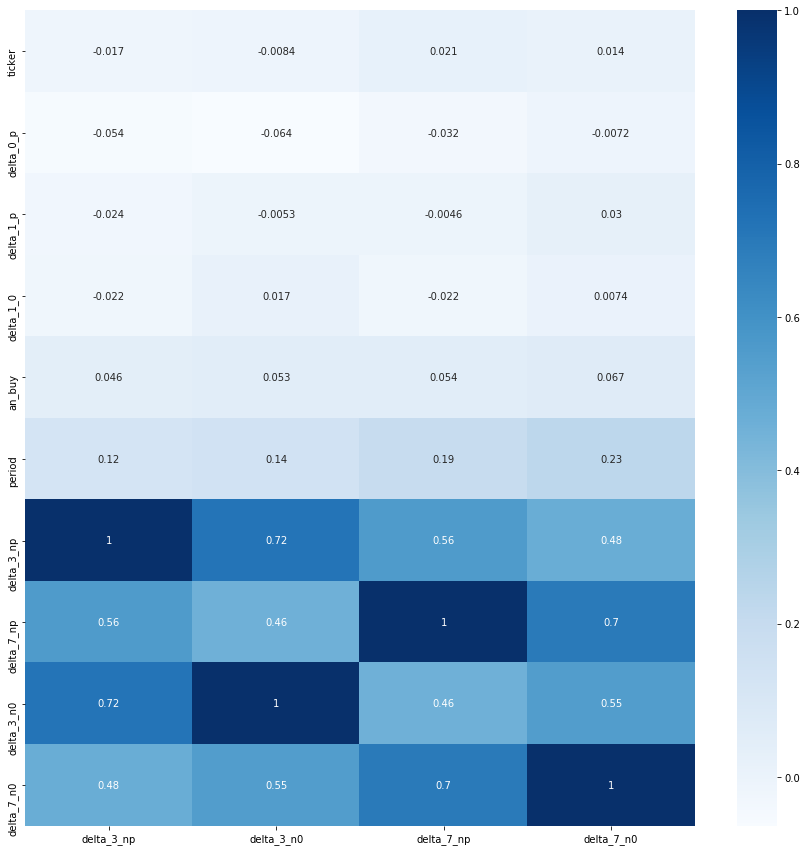

In [14]:
# visualizing the correlations with saleprice

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, cmap='Blues')